In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_path = os.path.join('./data/DATASETmin/DATASETmin/TRAIN')
test_path = os.path.join('./data/DATASETmin/DATASETmin/TEST')
img_size = 224

In [64]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.3
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.3
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (img_size, img_size),
    class_mode = 'categorical',
    subset = 'training'
)

val_generator = val_datagen.flow_from_directory(
    train_path,
    target_size = (img_size, img_size),
    class_mode = 'categorical',
    subset = 'validation'
)

test_generator = val_datagen.flow_from_directory(
    test_path,
    batch_size = 200,
    target_size = (img_size, img_size),
)

Found 490 images belonging to 10 classes.
Found 210 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [4]:
IMG_SHAPE = (224, 224, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

In [5]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 10,287,562
Trainable params: 8,029,578
Non-trainable params: 2,257,984
_________________________________________________________________


In [6]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', 
              optimizer = Adam(), 
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(train_generator, 
                    epochs=20, 
                    validation_data = val_generator) 

Epoch 1/20
16/16 [==============================] - 26s 1s/step - loss: 13.9099 - accuracy: 0.3531 - val_loss: 3.1356 - val_accuracy: 0.4286
Epoch 2/20
16/16 [==============================] - 17s 1s/step - loss: 1.9903 - accuracy: 0.4939 - val_loss: 1.3144 - val_accuracy: 0.5286
Epoch 3/20
16/16 [==============================] - 17s 1s/step - loss: 1.0641 - accuracy: 0.6571 - val_loss: 1.1793 - val_accuracy: 0.6286
Epoch 4/20
16/16 [==============================] - 17s 1s/step - loss: 0.6597 - accuracy: 0.7694 - val_loss: 0.8774 - val_accuracy: 0.7238
Epoch 5/20
16/16 [==============================] - 17s 1s/step - loss: 0.4215 - accuracy: 0.8633 - val_loss: 0.8387 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 17s 1s/step - loss: 0.3140 - accuracy: 0.8980 - val_loss: 0.9763 - val_accuracy: 0.7905
Epoch 7/20
16/16 [==============================] - 17s 1s/step - loss: 0.2301 - accuracy: 0.9449 - val_loss: 0.7756 - val_accuracy: 0.8000
Epoch 8/20
16/16 [=

In [124]:
val_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [8]:
num_of_test_samples = 200
batch_size = 32

Y_pred = model.predict_generator(val_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
print('Classification Report')
target_names = ['Batik Cendrawasih', 'Batik Dayak', 'Batik Ikat Celup', 'Batik Insang', 'Batik Kawung', 'Batik Megamendung', 
                'Batik Parang', 'Batik Poleng', 'Batik Sekar Jagad', 'Batik Tambal']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

C:\Users\ACER\AppData\Local\Temp\ipykernel_20184\3767723881.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(val_generator, num_of_test_samples // batch_size+1)


Confusion Matrix
[[2 1 2 3 2 2 2 0 2 5]
 [4 1 2 2 3 1 0 3 2 3]
 [4 2 3 2 2 1 4 0 0 3]
 [1 1 1 3 3 0 1 1 5 5]
 [3 2 2 1 1 6 2 1 2 1]
 [1 3 0 2 2 2 3 3 2 3]
 [2 2 4 3 2 1 1 1 3 2]
 [0 2 3 2 4 1 3 3 2 1]
 [2 1 2 1 4 3 2 2 3 1]
 [1 1 3 4 1 2 4 3 0 2]]
Classification Report
                   precision    recall  f1-score   support

Batik Cendrawasih       0.10      0.10      0.10        21
      Batik Dayak       0.06      0.05      0.05        21
 Batik Ikat Celup       0.14      0.14      0.14        21
     Batik Insang       0.13      0.14      0.14        21
     Batik Kawung       0.04      0.05      0.04        21
Batik Megamendung       0.11      0.10      0.10        21
     Batik Parang       0.05      0.05      0.05        21
     Batik Poleng       0.18      0.14      0.16        21
Batik Sekar Jagad       0.14      0.14      0.14        21
     Batik Tambal       0.08      0.10      0.09        21

         accuracy                           0.10       210
        macro avg   

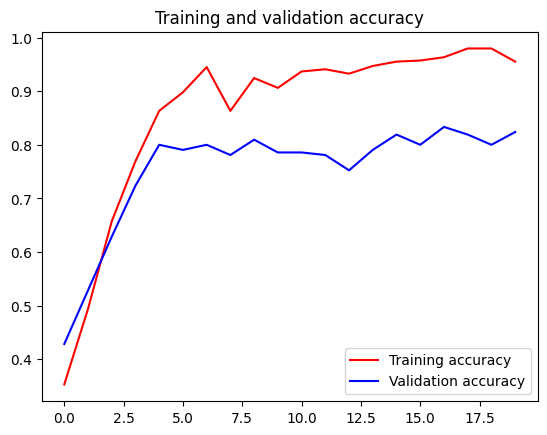

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [10]:
scores = model.evaluate(val_generator)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))

7/7 [==============================] - 4s 528ms/step - loss: 0.8837 - accuracy: 0.8238
evaluate accuracy: 82.38%


In [11]:
scores = model.evaluate(train_generator)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 13s 776ms/step - loss: 0.0592 - accuracy: 0.9735
evaluate accuracy: 97.35%


(200, 224, 224, 3)


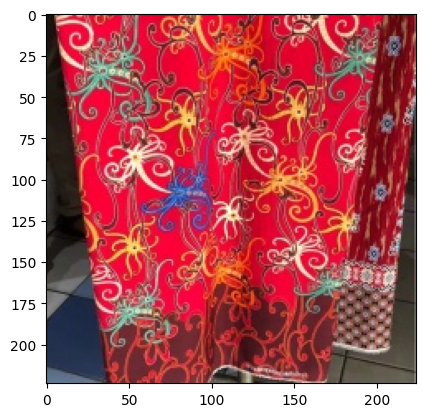

(200, 224, 224, 3)


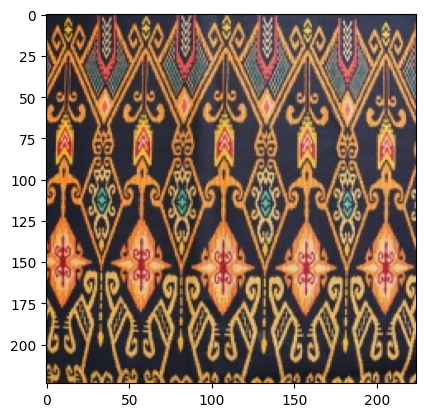

(200, 224, 224, 3)


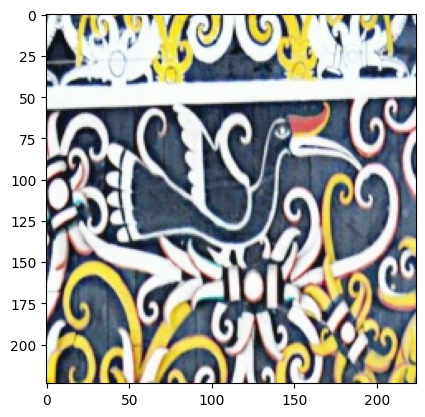

(200, 224, 224, 3)


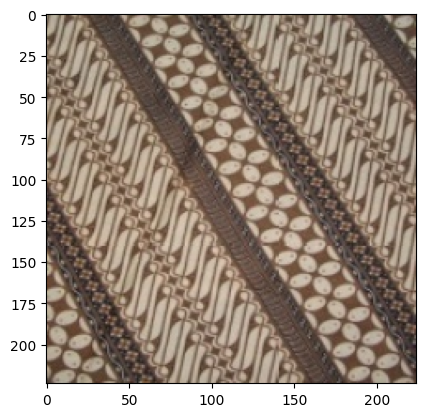

(200, 224, 224, 3)


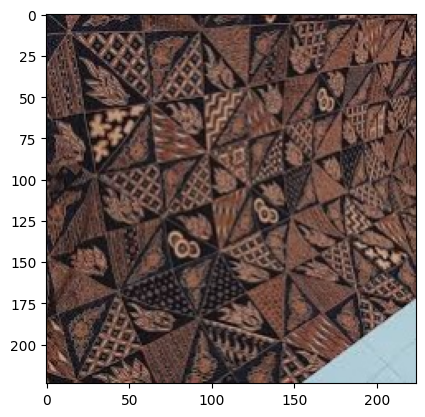

In [116]:
img, label = test_generator.next()
for i in range(5):
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[i])
    plt.show()

In [117]:
np.argmax(label, axis=1)

array([1, 1, 1, 6, 9, 1, 9, 3, 9, 5, 5, 3, 9, 2, 9, 0, 3, 8, 8, 6, 3, 0,
       8, 0, 7, 8, 9, 6, 3, 7, 8, 2, 9, 9, 2, 8, 0, 5, 1, 4, 5, 9, 1, 0,
       5, 5, 5, 4, 9, 6, 4, 7, 0, 3, 0, 2, 7, 0, 2, 1, 0, 7, 4, 8, 0, 5,
       1, 9, 6, 5, 2, 4, 3, 9, 6, 5, 7, 4, 3, 3, 3, 9, 7, 9, 1, 7, 8, 1,
       8, 7, 8, 9, 6, 3, 6, 7, 0, 2, 8, 7, 9, 2, 6, 4, 4, 8, 8, 7, 4, 5,
       2, 8, 5, 4, 6, 7, 6, 3, 8, 1, 7, 5, 2, 2, 3, 4, 1, 5, 0, 1, 2, 0,
       6, 2, 6, 2, 3, 9, 6, 9, 6, 4, 7, 5, 0, 5, 8, 6, 1, 2, 3, 3, 0, 3,
       2, 0, 5, 7, 1, 5, 0, 0, 3, 7, 1, 8, 4, 6, 7, 2, 4, 6, 2, 0, 4, 8,
       2, 3, 6, 2, 1, 0, 4, 6, 7, 3, 5, 4, 9, 4, 1, 1, 1, 7, 8, 9, 5, 4,
       4, 8], dtype=int64)

In [118]:
y_pred = model.predict(img.reshape(-1,224,224,3))

7/7 [==============================] - 3s 479ms/step


In [119]:
print(np.argmax(y_pred, axis=1))

[1 1 1 6 9 1 9 3 9 1 5 3 9 2 9 8 3 8 8 6 3 0 8 0 4 8 8 6 7 7 8 2 9 9 8 8 1
 5 8 4 5 9 1 0 5 5 5 4 9 6 4 3 0 2 1 2 7 2 2 1 6 7 2 1 0 5 1 9 6 5 2 4 3 9
 6 5 7 4 3 3 3 9 7 9 1 0 8 1 8 7 8 2 6 9 6 7 0 2 8 7 9 2 6 8 9 8 8 3 4 5 3
 8 5 2 6 7 9 3 8 1 7 8 3 2 3 4 1 6 0 1 2 0 6 2 6 2 3 9 6 9 6 4 7 5 0 5 1 6
 1 2 3 3 0 3 2 1 5 7 1 5 0 0 3 7 1 8 4 8 7 2 4 6 2 0 9 8 2 3 6 2 2 0 4 6 7
 3 5 4 4 4 1 1 4 1 9 4 5 4 4 4]


In [120]:
print(y_pred)

[[2.08e-10 1.00e+00 7.41e-06 ... 2.92e-13 6.42e-05 9.00e-14]
 [7.73e-07 9.50e-01 2.10e-05 ... 3.92e-08 4.77e-02 1.98e-03]
 [1.49e-07 1.00e+00 1.13e-06 ... 8.98e-08 1.83e-04 1.96e-10]
 ...
 [2.84e-12 4.97e-09 7.24e-04 ... 2.78e-15 3.79e-05 2.89e-08]
 [5.04e-12 3.75e-15 4.25e-08 ... 4.77e-20 7.82e-05 5.45e-12]
 [7.50e-10 2.16e-07 5.09e-03 ... 8.49e-12 3.73e-03 1.95e-05]]


In [121]:
conf_mat = confusion_matrix(np.argmax(label, axis=1), np.argmax(y_pred, axis=1))
conf_mat

array([[14,  3,  1,  0,  0,  0,  1,  0,  1,  0],
       [ 0, 17,  1,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 17,  2,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  1, 17,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  2,  0, 15,  0,  0,  0,  1,  2],
       [ 0,  1,  0,  0,  0, 17,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  1,  1],
       [ 1,  1,  0,  2,  1,  0,  0, 15,  0,  0],
       [ 0,  2,  0,  0,  1,  0,  0,  0, 16,  1],
       [ 0,  0,  1,  0,  2,  0,  0,  0,  1, 16]], dtype=int64)

In [122]:
classes = os.listdir(train_path)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

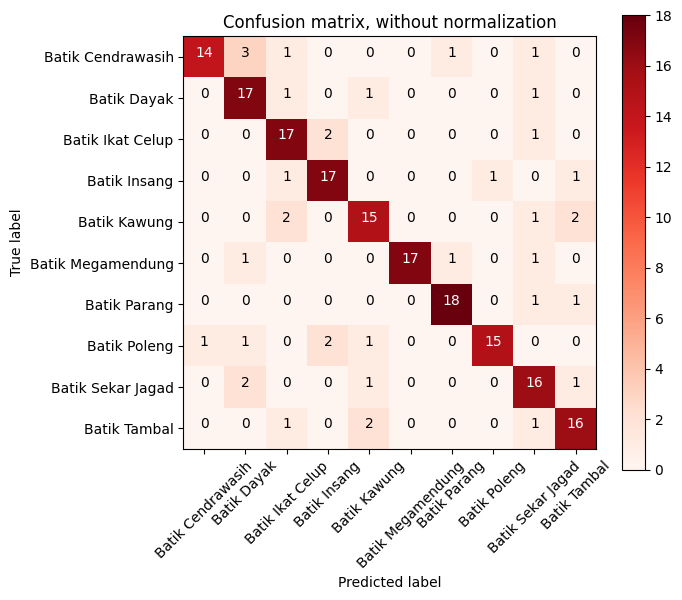

In [123]:
import itertools
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()